In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot 
%matplotlib inline

#### Technical Challenge Rankings
--------------------------
* tech_med : median technical challenge ranking over each episode
* tech_mean : same as `tech_med` but the mean
* tech : technical challenge ranking for that episode

In [25]:
tech = pd.read_csv("../RESULTS/gbbo.techinical.data.20190907.tsv",sep='\t')
feats = ['tech_mean','tech_med','tech']
tech.head()

,season,baker,index,episode,tech_mean,tech_med,tech,place
0,1,Annetha,6,1,2.00,2.0,2,6
1,1,Annetha,6,2,4.50,4.5,7,6
2,1,Annetha,6,3,3.00,2.0,0,6
3,1,Annetha,6,4,2.25,1.0,0,6
4,1,Annetha,6,5,1.80,0.0,0,6


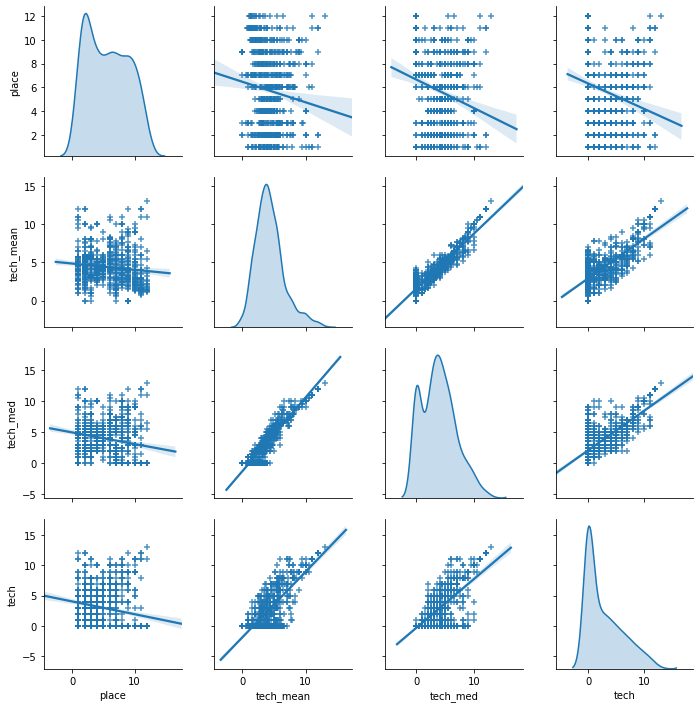

In [8]:
# No Scaling
sns.pairplot(
    tech,
    vars=['place']+feats,
    kind='reg',
    markers='+',
    diag_kind='kde'
)

Data is not scaled or normalized. 

Now apply a MinMax scaler so the minimum value is 0 and the maximum value is 1

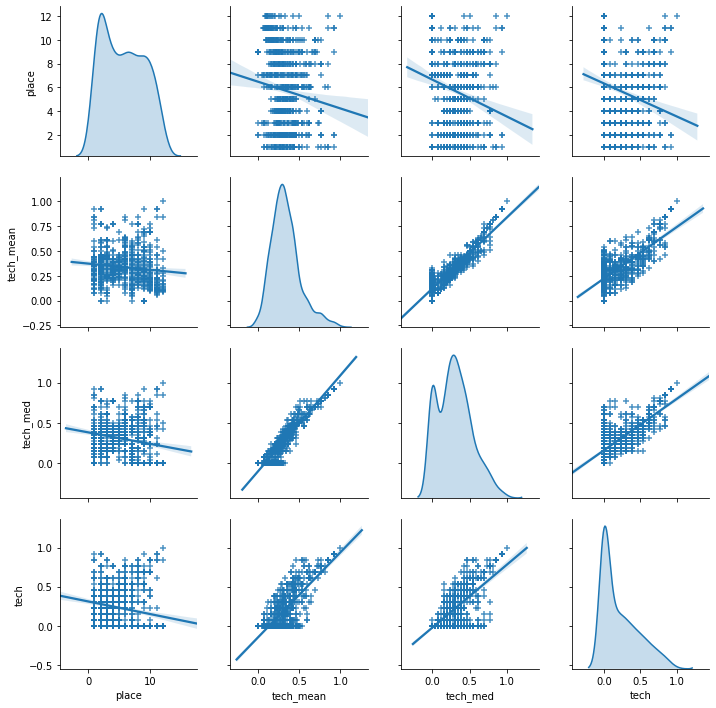

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = tech
scaler = MinMaxScaler()
# fit the scaler
scaler.fit(mms[feats])
# transform values
mms[feats] = scaler.transform(mms[feats])
#############
sns.pairplot(
    mms,
    vars=['place']+feats,
    kind='reg',
    markers='+',
    diag_kind='kde'
)

Transforms values using quantiles. Forces a uniform or normal distribution. 

>this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme

>Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

[sklearn link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

/usr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2142: UserWarning: 'ignore_implicit_zeros' takes effect only with sparse matrix. This parameter has no effect.
  warnings.warn("'ignore_implicit_zeros' takes effect only with"


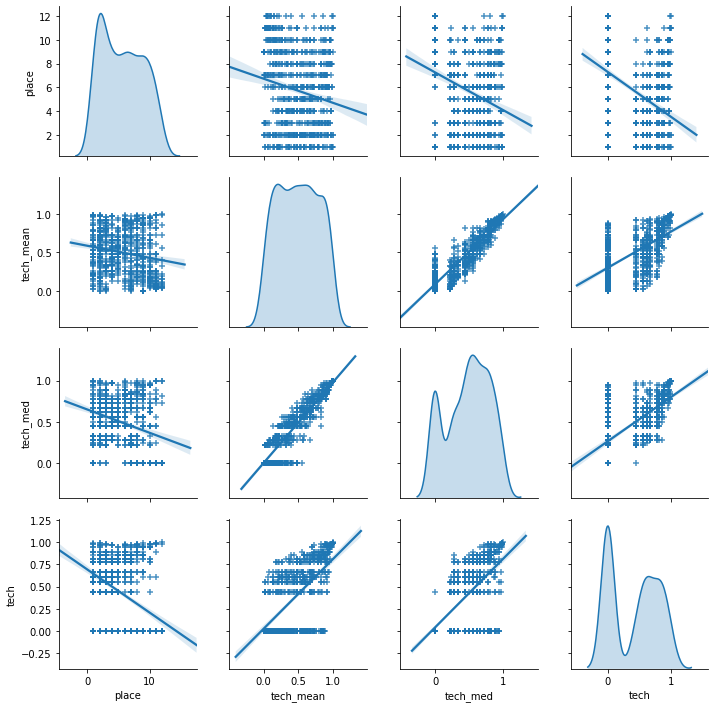

In [23]:
from sklearn.preprocessing import QuantileTransformer
qua = tech
scaler = QuantileTransformer(
    n_quantiles=10,
    random_state=42,
    ignore_implicit_zeros=True, #sparse matrix
)
# fit the scaler
scaler.fit(qua[feats])
# transform values
qua[feats] = scaler.transform(qua[feats])
#############
sns.pairplot(
    qua,
    vars=['place']+feats,
    kind='reg',
    markers='+',
    diag_kind='kde'
)

Quantile normalization produces more linear associations. This should be compared with the min-max scaling